### Conway's game of life

- http://www.scholarpedia.org/article/Game_of_Life
- https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-087-practical-programming-in-c-january-iap-2010/labs/MIT6_087IAP10_lab01.pdf
- https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-087-practical-programming-in-c-january-iap-2010/labs/MIT6_087IAP10_lab01.pdf
- https://www.uu.nl/sites/default/files/hanson.pdf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import bernoulli

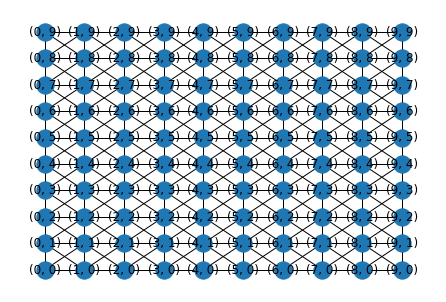

In [ ]:
# Cell automata structure: live in a grid
# Each cell with its kneigborhood
# A grid is regular graph
grid_size = 10

G = nx.grid_2d_graph(grid_size, grid_size)

pos = {(x,y): (x, y) for x,y in G.nodes()}

G.add_edges_from(
    [((x,y), (x+1, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)] + 
    [((x+1,y), (x, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)]
)

nx.draw(G, pos=pos, with_labels=True)

In [ ]:
# Automata state
states = np.zeros((grid_size, grid_size), dtype='int')
prob_alive = 0.1
np.random.seed(1234)
states = bernoulli.rvs(prob_alive, size=(grid_size, grid_size))
states

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [ ]:
node = (6,6)
neighbors = np.array(list(G.neighbors(node)))
neighbors, neighbors[:,0], neighbors[:,1]

(array([[5, 6],
        [7, 6],
        [6, 5],
        [6, 7],
        [5, 5],
        [7, 7],
        [5, 7],
        [7, 5]]),
 array([5, 7, 6, 6, 5, 7, 5, 7]),
 array([6, 6, 5, 7, 5, 7, 7, 5]))

In [ ]:
neighbors = np.array(list(G.neighbors(node)))
activity = states[neighbors[:,0], neighbors[:,1]].sum()
activity, states[node]

(3, 0)

In [ ]:
# Cell is alive
if states[node]:
    # Isolation and die
    if activity < 2:
        states[node] = 0
    # Overpopulated and die
    if activity > 3:
        sates[node] = 0
# Cell is dead
else:
    # Get born
    if activity == 3:
        states[node] = 1
states[node]

1

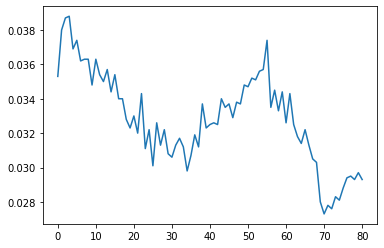

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import bernoulli

# Cell automata structure: live in a grid
# Each cell with its kneigborhood
# A grid is regular graph
grid_size = 100
prob_alive = 0.1
time = 100

G = nx.grid_2d_graph(grid_size, grid_size)

pos = {(x,y): (x, y) for x,y in G.nodes()}

G.add_edges_from(
    [((x,y), (x+1, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)] + 
    [((x+1,y), (x, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)]
)

# Automata state init at 0
#states = np.zeros((grid_size, grid_size), dtype='int')

# Oscillator
"""
x = np.array([5,5,5])
y = np.array([4,5,6])
states[(x,y)] = 1
"""

# slider
"""
x = np.array([5,5])
y = np.array([4,5])
states[(x,y)] = 1
x = np.array([4,4])
y = np.array([5,6])
states[(x,y)] = 1
states[6,6] = 1
"""

np.random.seed(1234)
states = bernoulli.rvs(prob_alive, size=(grid_size, grid_size))

mean_activity = [states.mean()]

#plt.imshow(states)
#plt.show()

# Update automata to t time steps:
# Parallel (synchronous) update
for t in range(time):
    states_t = states.copy()  # state in t-1
    for node in G:
        neighbors = np.array(list(G.neighbors(node)))
        activity = states_t[neighbors[:,0], neighbors[:,1]].sum()
        # Cell is alive
        if states_t[node]:
            # Isolation and die
            if activity < 2:
                states[node] = 0
            # Overpopulated and die
            if activity > 3:
                states[node] = 0
        # Cell is dead
        else:
            # Get born
            if activity == 3:
                states[node] = 1
    #plt.imshow(states); plt.show()
    mean_activity += [states.mean()]
plt.plot(mean_activity[20:])  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>